In [ ]:
# import pandas as pd

# # Load the Excel file
# file_path = r"C:\SAM_DAL\MULTIMODAL\income_prediction\Dataset_with_dictionary.xlsx"
# xls = pd.ExcelFile(file_path)

# # Loop through each sheet and save separately
# for sheet_name in xls.sheet_names:
#     df = xls.parse(sheet_name)  # Read the sheet
#     output_file = f"{sheet_name}.xlsx"  # Name the output file
#     df.to_excel(output_file, index=False)  # Save the sheet separately
#     print(f"Saved {output_file}")


In [6]:
import pandas as pd

# Load the Excel file
file_path = r"C:\SAM_DAL\MULTIMODAL\income_prediction\Dataset_with_dictionary.xlsx"
xls = pd.ExcelFile(file_path)

# Get sheet names
sheet_names = xls.sheet_names
sheet_names


['TrainData', 'TestData', 'Dictionary']

In [2]:
# Load TrainData and TestData sheets
train_df = pd.read_excel(xls, sheet_name="TrainData")
test_df = pd.read_excel(xls, sheet_name="TestData")

# Get column names
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

# Compare column names
matching_columns = train_columns.intersection(test_columns)
train_only_columns = train_columns - test_columns
test_only_columns = test_columns - train_columns

# Count matches
match_percentage = (len(matching_columns) / len(train_columns)) * 100

# Results
{
    "Total Train Columns": len(train_columns),
    "Total Test Columns": len(test_columns),
    "Matching Columns": len(matching_columns),
    "Match Percentage": match_percentage,
    "Train Only Columns": list(train_only_columns),
    "Test Only Columns": list(test_only_columns)
}


{'Total Train Columns': 105,
 'Total Test Columns': 104,
 'Matching Columns': 104,
 'Match Percentage': 99.04761904761905,
 'Train Only Columns': ['Target_Variable/Total Income'],
 'Test Only Columns': []}

# The test data doesnt have ['Target_Variable/Total Income'] 
but as in data dictionary the ['Target_Variable/Total Income'] is the sum of Total income including both Agri and non Agri in INR  but the test and train doesent have column named or related to Agri income so the ['Target_Variable/Total Income']  cannot be defined for test sheet 

since the income from agriculture is not defined in the test we just split the Train dataset sheet to train test and valid and use it for further

other methodes that can be used to get the agriculture income  is 
1. Agri Income=Total Land For Agriculture × Crop Yield Factor × Market Price
 (but the market price is not available)
   

In [5]:
# Identify numeric and categorical columns
train_df_sample = pd.read_excel(xls, sheet_name="TrainData", nrows=500)  # Load a sample for efficiency

numeric_columns = train_df_sample.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_df_sample.select_dtypes(exclude=['number']).columns.tolist()

# Compute correlation with the target variable
correlation = train_df_sample[numeric_columns].corrwith(train_df_sample["Target_Variable/Total Income"]).dropna()

# Sort by absolute correlation value
correlation_sorted = correlation.abs().sort_values(ascending=False)

# Top influencing features
top_influencing_features = correlation_sorted.head(10)

# Results
{
    "Total Numeric Columns": len(numeric_columns),
    "Total Categorical Columns": len(categorical_columns),
    "Top 10 Influencing Features": top_influencing_features.to_dict()
}


{'Total Numeric Columns': 67,
 'Total Categorical Columns': 38,
 'Top 10 Influencing Features': {'Target_Variable/Total Income': 1.0,
  'Non_Agriculture_Income': 0.776468747645634,
  'Kharif Seasons Cropping density in 2021': 0.12082785299098706,
  'Rabi Seasons Cropping density in 2022': 0.12082785299098706,
  'Rabi Seasons Cropping density in 2020': 0.09790756326598173,
  'perc_of_Wall_material_with_Burnt_brick': 0.09617365752985185,
  'Kharif Seasons  Cropping density in 2022': 0.07632229094622907,
  'Total_Land_For_Agriculture': 0.07512598393305175,
  'Kharif Seasons Kharif Season Irrigated area in 2020': 0.06996118968070411,
  'perc_of_pop_living_in_hh_electricity': 0.05921499465287853}}

In [12]:
import pandas as pd

# Load a sample of the training data for efficiency
train_df_sample = pd.read_excel(xls, sheet_name="TrainData")

# Identify numeric columns
numeric_columns = train_df_sample.select_dtypes(include=['number']).columns.tolist()

# Compute the full correlation matrix among all numeric features
correlation_matrix = train_df_sample[numeric_columns].corr()

# Optional: If you want to view the correlation pairs (excluding self-correlation), you can "unstack" the matrix:
corr_pairs = (
    correlation_matrix
    .abs()  # work with absolute correlation values
    .unstack()  # convert to Series with multi-index (feature1, feature2)
    .drop_duplicates()  # remove duplicate pairs since the matrix is symmetric
)

# Alternatively, if you want to sort all pairs by correlation value:
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# Prepare results
results = {
    "Total Numeric Columns": len(numeric_columns),
    "Correlation Matrix": correlation_matrix.to_dict(),
    "Top 10 Correlated Feature Pairs": sorted_corr_pairs.head(10).to_dict()
}

print(results)


{'Total Numeric Columns': 67, 'Correlation Matrix': {'FarmerID': {'FarmerID': 1.0, 'Zipcode': 0.0038111177539418084, 'No_of_Active_Loan_In_Bureau': -0.0009320819136641331, 'Avg_Disbursement_Amount_Bureau': -0.0005025327856570304, 'Non_Agriculture_Income': 0.003996845702123614, 'Total_Land_For_Agriculture': -0.0016474049642893514, 'K022-Proximity to nearest mandi (Km)': 0.0034017826053756176, 'K022-Proximity to nearest railway (Km)': -0.0002941266072818919, 'KO22-Village score based on socio-economic parameters (0 to 100)': -0.0024935429934271973, 'K022-Seasonal Average Rainfall (mm)': -0.0023496091753188813, 'R022-Seasonal Average Rainfall (mm)': 0.0020295591490759155, 'K021-Seasonal Average Rainfall (mm)': -0.006822960164786826, 'R021-Seasonal Average Rainfall (mm)': -0.0020586326075129895, 'R020-Seasonal Average Rainfall (mm)': 0.0015860775961109267, 'Perc_of_house_with_6plus_room': -0.003399007223172157, 'Women_15_19_Mothers_or_Pregnant_at_time_of_survey': 0.0016249680004870265, 'pe

Total Train Columns: 105
Total Test Columns: 104
Matching Columns: 104
Match Percentage: 99.05%
Train Only Columns: {'Target_Variable/Total Income'}
Test Only Columns: set()

Top 10 Influencing Features:
Target_Variable/Total Income                                           1.000000
Non_Agriculture_Income                                                 0.936815
Rabi Seasons Seasonal average groundwater thickness (cm) in 2021       0.017665
Rabi Seasons Seasonal average groundwater thickness (cm) in 2020       0.016205
Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022    0.016040
                                                                         ...   
Rabi Seasons Agricultural performance in 2020                          0.000260
K022-Total Geographical Area (in Hectares)-                            0.000207
Kharif Seasons Agricultural Score in 2020                              0.000161
K022-Net Agri area (in Ha)-                                            0.000

C:\Users\harsh\AppData\Local\Temp\ipykernel_24972\2371577083.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_influencing_features.index, y=top_influencing_features.values, palette="viridis")


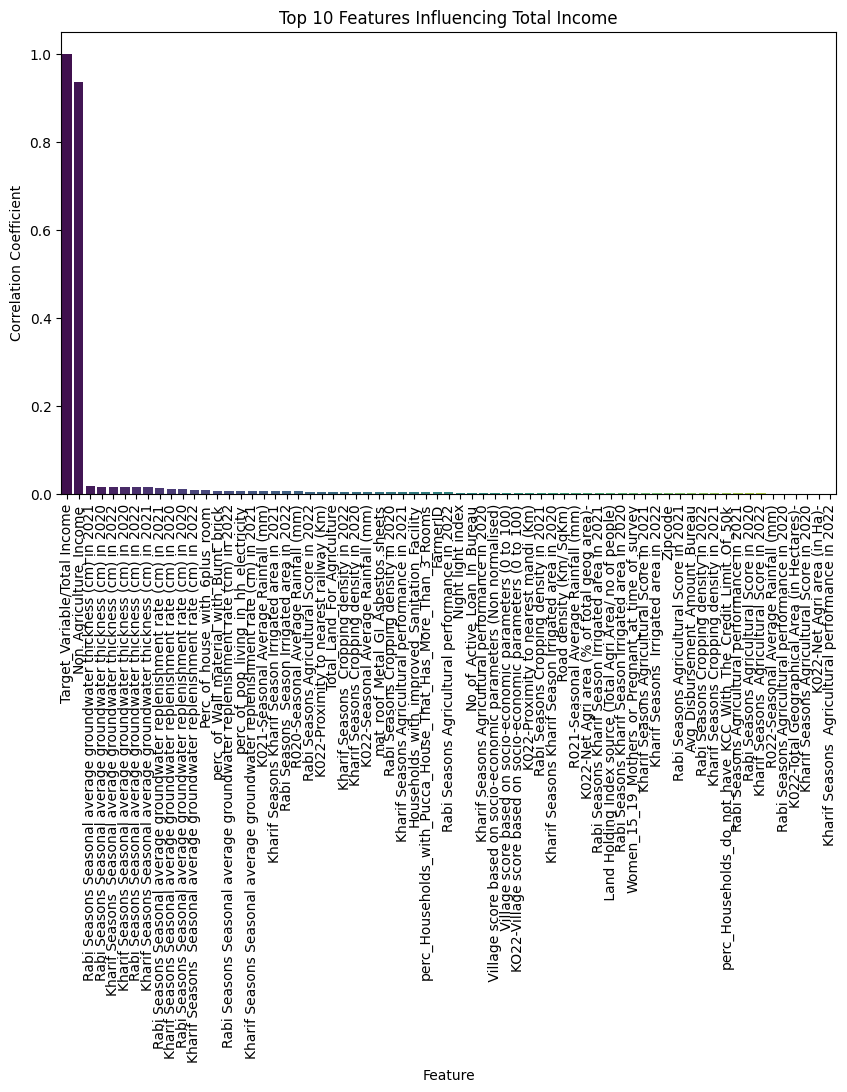

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = r"C:\SAM_DAL\MULTIMODAL\income_prediction\Dataset_with_dictionary.xlsx"
xls = pd.ExcelFile(file_path)

# Load TrainData and TestData
train_df = pd.read_excel(xls, sheet_name="TrainData")  # Load sample for efficiency
test_df = pd.read_excel(xls, sheet_name="TestData")  # Load only headers for comparison

# Get column names
train_columns_set = set(train_df.columns)
test_columns_set = set(test_df.columns)

# Compare column names
matching_columns = train_columns_set.intersection(test_columns_set)
train_only_columns = train_columns_set - test_columns_set
test_only_columns = test_columns_set - train_columns_set

# Print comparison results
print(f"Total Train Columns: {len(train_columns_set)}")
print(f"Total Test Columns: {len(test_columns_set)}")
print(f"Matching Columns: {len(matching_columns)}")
print(f"Match Percentage: {len(matching_columns) / len(train_columns_set) * 100:.2f}%")
print(f"Train Only Columns: {train_only_columns}")
print(f"Test Only Columns: {test_only_columns}")

# Identify numeric and categorical columns
numeric_columns = train_df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_df.select_dtypes(exclude=['number']).columns.tolist()

# Compute correlation with the target variable
correlation = train_df[numeric_columns].corrwith(train_df["Target_Variable/Total Income"]).dropna()

# Sort by absolute correlation value
correlation_sorted = correlation.abs().sort_values(ascending=False)

# Top 10 influencing features
top_influencing_features = correlation_sorted

# Print correlation results
print("\nTop 10 Influencing Features:")
print(top_influencing_features)

# Plot correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=top_influencing_features.index, y=top_influencing_features.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 10 Features Influencing Total Income")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.show()


In [7]:
import pandas as pd

# Load a sample of the training data for efficiency
train_df_sample = pd.read_excel(xls, sheet_name="TrainData", nrows=500)

# Identify numeric columns
numeric_columns = train_df_sample.select_dtypes(include=['number']).columns.tolist()

# Compute the full correlation matrix among all numeric features
correlation_matrix = train_df_sample[numeric_columns].corr()

# Optional: If you want to view the correlation pairs (excluding self-correlation), you can "unstack" the matrix:
corr_pairs = (
    correlation_matrix
    .abs()  # work with absolute correlation values
    .unstack()  # convert to Series with multi-index (feature1, feature2)
    .drop_duplicates()  # remove duplicate pairs since the matrix is symmetric
)

# Alternatively, if you want to sort all pairs by correlation value:
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# Prepare results
results = {
    "Total Numeric Columns": len(numeric_columns),
    "Correlation Matrix": correlation_matrix.to_dict(),
    "Top 10 Correlated Feature Pairs": sorted_corr_pairs.head(10).to_dict()
}

print(results)


{'Total Numeric Columns': 67, 'Correlation Matrix': {'FarmerID': {'FarmerID': 1.0, 'Zipcode': 0.012890316880088907, 'No_of_Active_Loan_In_Bureau': -0.032512675591393085, 'Avg_Disbursement_Amount_Bureau': -0.03379831429089333, 'Non_Agriculture_Income': -0.00033087658163514263, 'Total_Land_For_Agriculture': 0.04331724267849332, 'K022-Proximity to nearest mandi (Km)': -0.08588576564363216, 'K022-Proximity to nearest railway (Km)': -0.009658457256659325, 'KO22-Village score based on socio-economic parameters (0 to 100)': 0.08819514179882888, 'K022-Seasonal Average Rainfall (mm)': -0.05422869159077839, 'R022-Seasonal Average Rainfall (mm)': 0.032293476482725854, 'K021-Seasonal Average Rainfall (mm)': -0.05035689799158167, 'R021-Seasonal Average Rainfall (mm)': -0.07615303450246912, 'R020-Seasonal Average Rainfall (mm)': 0.03941389898774195, 'Perc_of_house_with_6plus_room': -0.04601563591909388, 'Women_15_19_Mothers_or_Pregnant_at_time_of_survey': 0.0023127191907357644, 'perc_of_pop_living_i

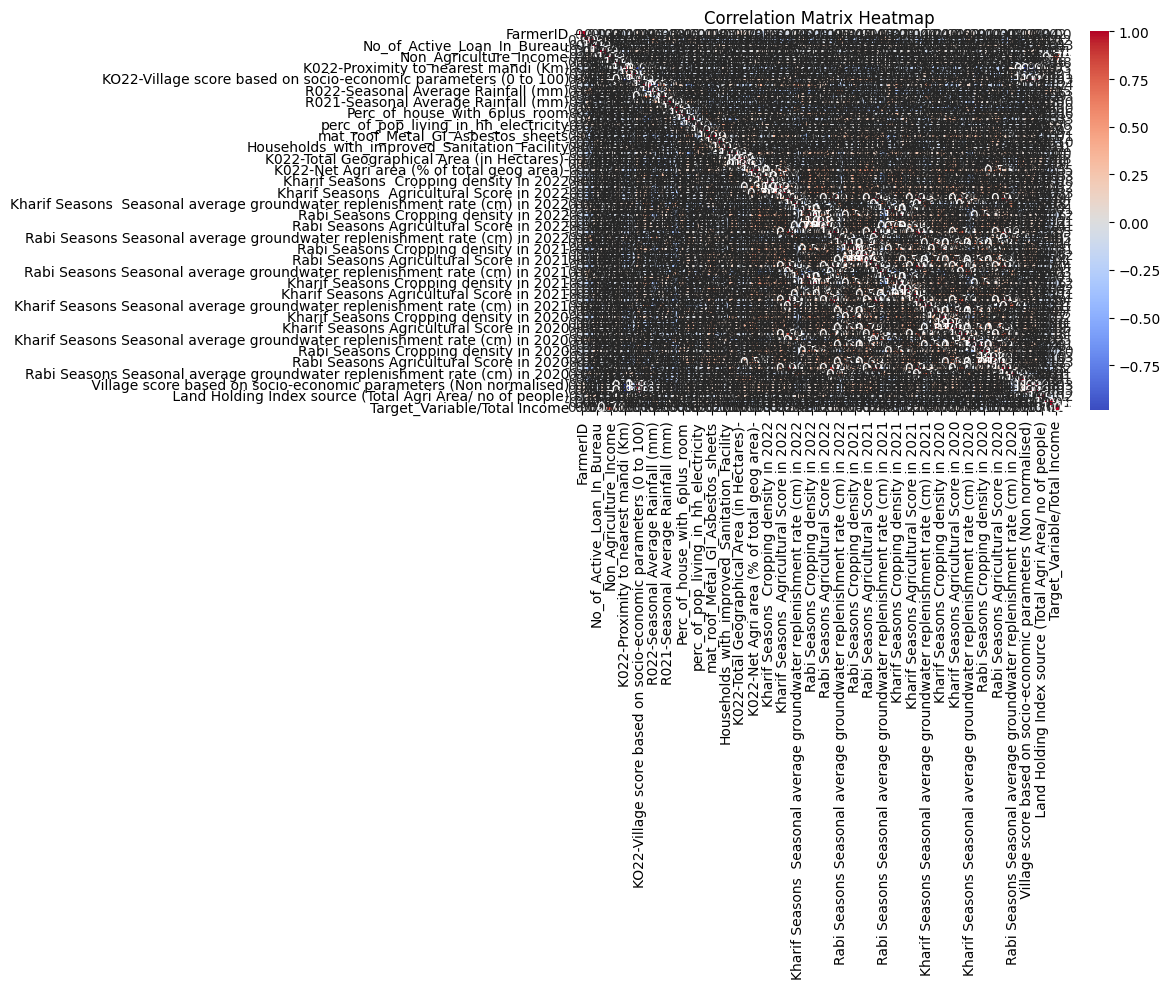

C:\Users\harsh\AppData\Local\Temp\ipykernel_5888\491438582.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


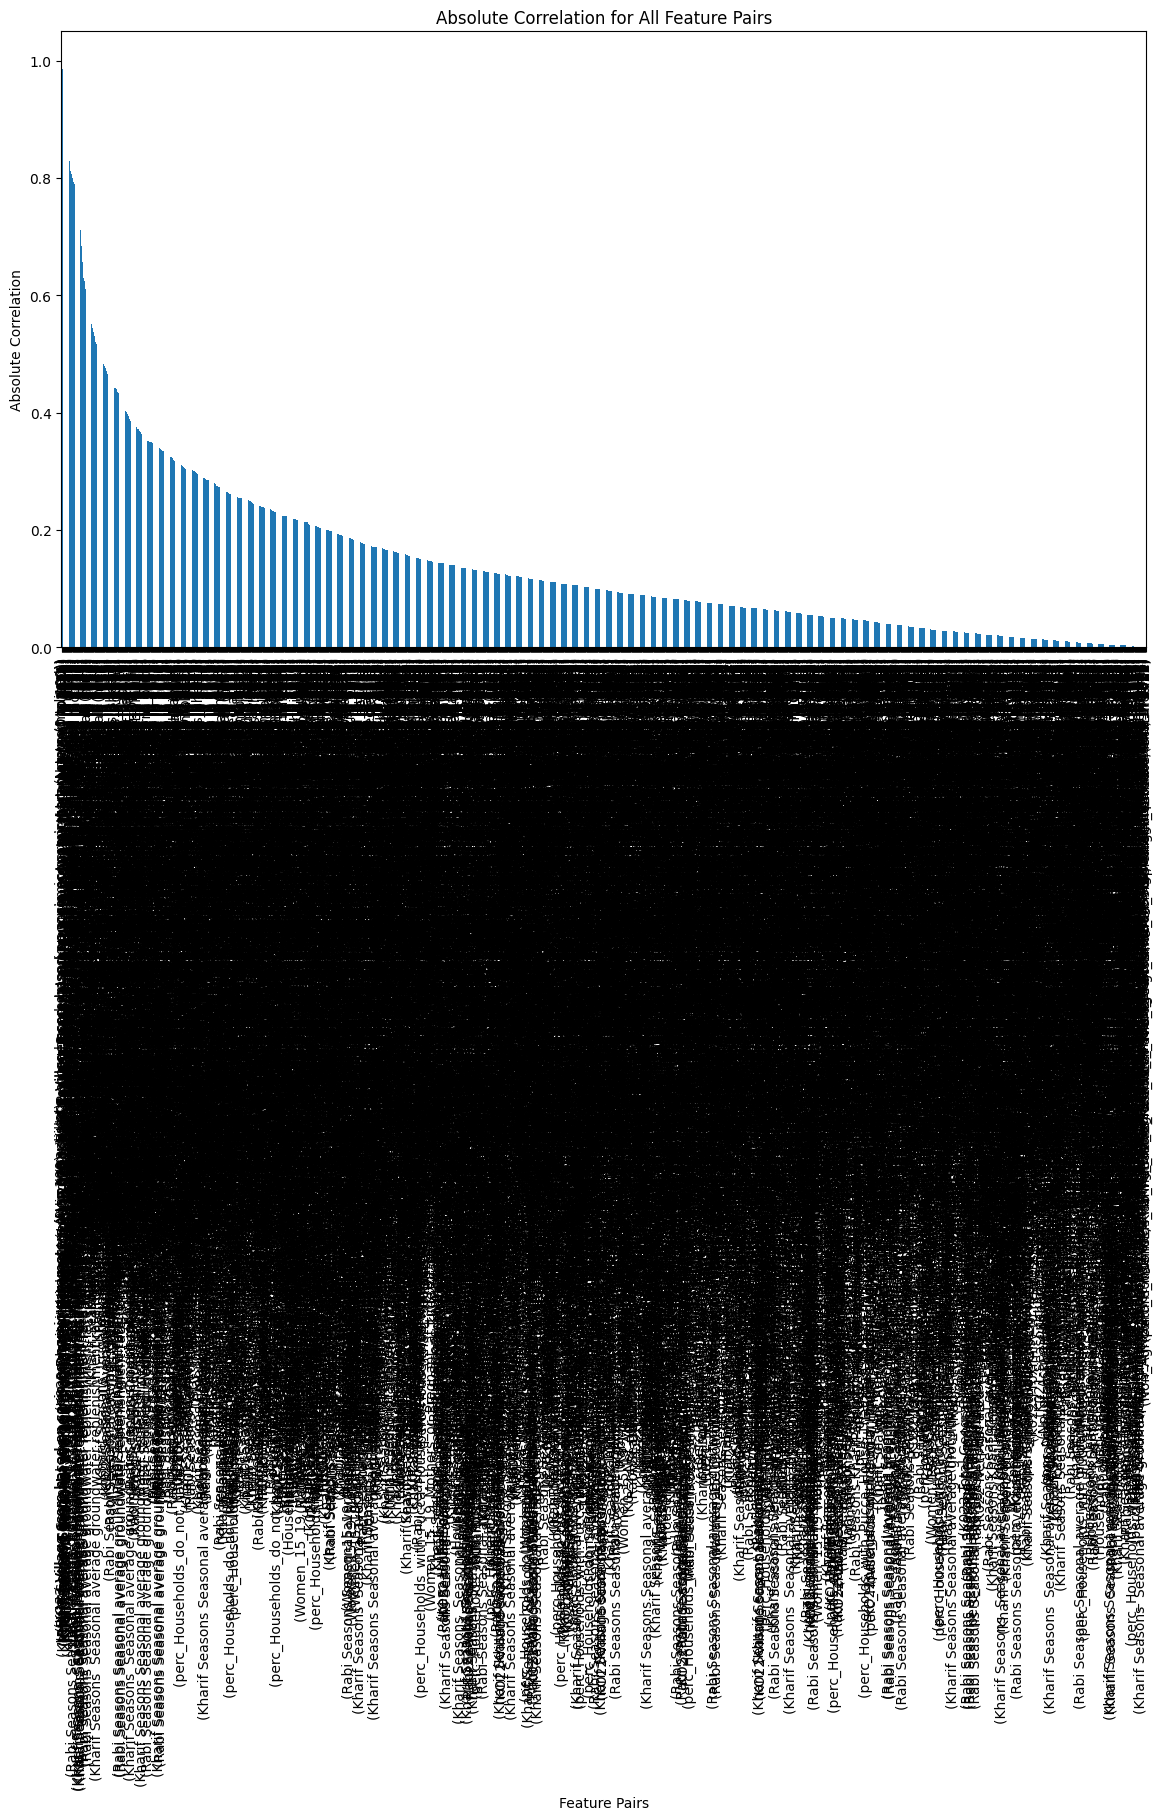

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'xls' is defined (e.g., xls = "path/to/your/excel_file.xlsx")
# Load a sample of the training data for efficiency
train_df_sample = pd.read_excel(xls, sheet_name="TrainData", nrows=500)

# --- Identify Numeric Columns ---
numeric_columns = train_df_sample.select_dtypes(include=['number']).columns.tolist()

# --- Compute the Full Correlation Matrix ---
correlation_matrix = train_df_sample[numeric_columns].corr()

# --- Plot 1: Heatmap of the Correlation Matrix ---
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()  # Adjust layout for neat display
plt.show()

# --- Compute Correlation Pairs ---
# Unstack the matrix to create a Series with a multi-index (feature1, feature2)
# and take the absolute value of correlations.
corr_pairs = correlation_matrix.abs().unstack()

# Remove duplicate pairs by dropping duplicates. Since the matrix is symmetric,
# each pair appears twice (e.g., (A, B) and (B, A)). Drop one of them.
corr_pairs = corr_pairs.drop_duplicates()

# Optionally, remove self-correlations (where the pair is the same feature).
corr_pairs = corr_pairs[corr_pairs < 1]

# Sort all pairs by correlation value in descending order
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# --- Plot 2: Bar Chart of All Correlation Pairs ---
plt.figure(figsize=(14, 8))
sorted_corr_pairs.plot(kind='bar')
plt.ylabel("Absolute Correlation")
plt.xlabel("Feature Pairs")
plt.title("Absolute Correlation for All Feature Pairs")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np

# --- Load the Data ---
xls = pd.ExcelFile(r"C:\SAM_DAL\MULTIMODAL\income_prediction\Dataset_with_dictionary.xlsx")
train_df_sample = pd.read_excel(xls, sheet_name="TrainData")

# --- Identify Numeric Columns ---
numeric_columns = train_df_sample.select_dtypes(include=['number']).columns.tolist()

# --- Compute the Full Correlation Matrix ---
correlation_matrix = train_df_sample[numeric_columns].corr()

# Option 1: Simply print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Option 2: Convert the correlation matrix into a long-format DataFrame that lists all unique combinations.
# We will extract only the upper triangle (without the diagonal) to avoid duplicate pairs.
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
corr_long = correlation_matrix.where(mask).stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

print("\nAll Unique Feature Pair Correlation Scores:")
print(corr_long)


Correlation Matrix:
                                                    FarmerID   Zipcode  \
FarmerID                                            1.000000  0.003811   
Zipcode                                             0.003811  1.000000   
No_of_Active_Loan_In_Bureau                        -0.000932 -0.021868   
Avg_Disbursement_Amount_Bureau                     -0.000503 -0.020230   
Non_Agriculture_Income                              0.003997 -0.000031   
...                                                      ...       ...   
 Village score based on socio-economic paramete... -0.002494 -0.135379   
 Village score based on socio-economic paramete... -0.002494 -0.135379   
 Land Holding Index source (Total Agri Area/ no... -0.000459  0.038657   
 Road density (Km/ SqKm)                            0.004927  0.069697   
Target_Variable/Total Income                        0.002850 -0.001379   

                                                    No_of_Active_Loan_In_Bureau  \
FarmerID

In [11]:
import pandas as pd
import numpy as np

# --- Load the Data ---
xls = pd.ExcelFile(r"C:\SAM_DAL\MULTIMODAL\income_prediction\Dataset_with_dictionary.xlsx")
df = pd.read_excel(xls, sheet_name="TrainData")

# --- Identify Numeric Columns ---
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# --- Compute the Full Correlation Matrix ---
correlation_matrix = df[numeric_columns].corr()

# --- Convert the Correlation Matrix into Long Format ---
# Use a mask to extract only the upper triangle (excluding the diagonal) to avoid duplicate pairs.
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
corr_long = correlation_matrix.where(mask).stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

# --- Combine the Feature Names into a Single Column "features" ---
corr_long['features'] = corr_long['Feature1'] + " & " + corr_long['Feature2']
# Select only the new "features" column and the "Correlation" score
corr_long = corr_long[['features', 'Correlation']]

# --- Sort the Pairs by Absolute Correlation in Descending Order ---
corr_long_sorted = corr_long.reindex(corr_long['Correlation'].abs().sort_values(ascending=False).index)

# --- Display the Top N Feature Pairs ---
top_n = 50  # Change this number to display more or fewer top pairs
print(f"Top {top_n} Feature Pairs by Absolute Correlation:")
print(corr_long_sorted.head(top_n))


Top 50 Feature Pairs by Absolute Correlation:
                                               features  Correlation
2201   Village score based on socio-economic paramet...     1.000000
553   KO22-Village score based on socio-economic par...     1.000000
1592  Rabi Seasons  Season Irrigated area in 2022 & ...     1.000000
554   KO22-Village score based on socio-economic par...     1.000000
1627  Rabi Seasons Cropping density in 2022 & Kharif...     1.000000
1720  Rabi Seasons Seasonal average groundwater thic...     0.981810
1525  Kharif Seasons  Seasonal average groundwater t...     0.975901
1726  Rabi Seasons Seasonal average groundwater thic...     0.975246
1519  Kharif Seasons  Seasonal average groundwater t...     0.971687
2032  Kharif Seasons Seasonal average groundwater th...     0.967434
1513  Kharif Seasons  Seasonal average groundwater t...     0.964272
1891  Rabi Seasons Seasonal average groundwater thic...     0.962132
1537  Kharif Seasons  Seasonal average groundwater t...  

# TAB TRANSFORMERS

2025-02-11 17:23:35,779 - INFO - Loading raw data from Excel...
2025-02-11 17:24:08,989 - INFO - Columns in raw data: ['farmerid', 'state', 'region', 'sex', 'city', 'zipcode', 'district', 'village', 'marital_status', 'location', 'address type', 'ownership', 'no_of_active_loan_in_bureau', 'avg_disbursement_amount_bureau', 'non_agriculture_income', 'total_land_for_agriculture', 'k022-village category based on agri parameters (good, average, poor)', 'k022-nearest mandi name', 'k022-proximity to nearest mandi (km)', 'k022-proximity to nearest railway (km)', 'ko22-village score based on socio-economic parameters (0 to 100)', 'k022-village category based on socio-economic parameters (good, average, poor)', 'k022-seasonal average rainfall (mm)', 'k022-ambient temperature (min & max)', 'r022-village category based on agri parameters (good, average, poor)', 'r022-seasonal average rainfall (mm)', 'r022-ambient temperature (min & max)', 'k021-seasonal average rainfall (mm)', 'k021-ambient tempera

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.7 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  1.2 M │ train │
│ 2 │ _head            │ LinearHead             │  1.3 K │ train │
│ 3 │ loss             │ L1Loss                 │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 2.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.9 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 304                                                                                         
Modules in eval mode: 0

Output()

/opt/anaconda3/envs/Cattle/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424:
The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

/opt/anaconda3/envs/Cattle/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424:
The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

2025-02-11 22:27:48,411 - INFO - `Trainer.fit` stopped: `max_epochs=80` reached.


2025-02-11 22:27:48,866 - INFO - Training the model completed
2025-02-11 22:27:48,867 - INFO - Loading the best model
2025-02-11 22:27:48,971 - INFO - Evaluating model on test set...


Output()

/opt/anaconda3/envs/Cattle/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.01598849706351757         │
│ test_mean_absolute_percentage_error │          2.617762565612793          │
│       test_mean_squared_error       │        0.005378740839660168         │
└─────────────────────────────────────┴─────────────────────────────────────┘

2025-02-11 22:28:12,657 - INFO - Test Evaluation Results: [{'test_loss': 0.01598849706351757, 'test_mean_absolute_percentage_error': 2.617762565612793, 'test_mean_squared_error': 0.005378740839660168}]
2025-02-11 22:28:12,658 - INFO - Built-in MAPE: 2.6178
2025-02-11 22:29:43,130 - INFO - Test results saved to: tabres/test_results.csv


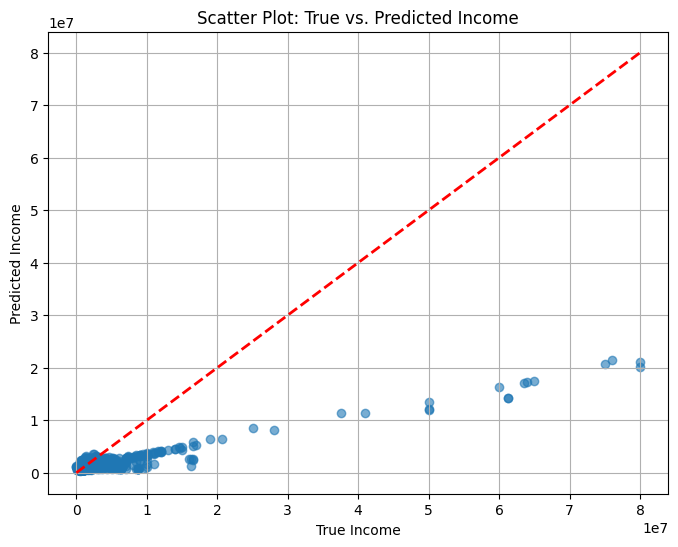

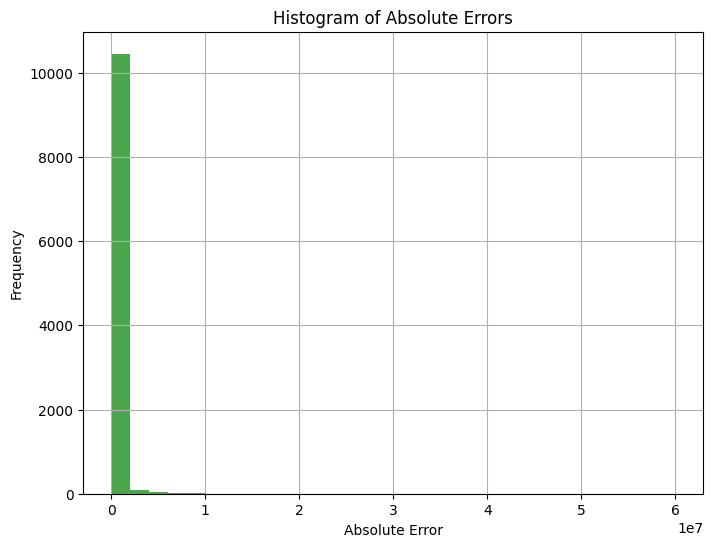

2025-02-11 22:29:43,966 - INFO - Trained model saved to: tabres/tabtransformer_model.pth


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import warnings
import torch

# Suppress FutureWarnings coming from pytorch_tabular/pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import pytorch-tabular classes (ensure you have installed pytorch-tabular via pip)
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models.tab_transformer import TabTransformerConfig

# ----------------------------------------------------------------------
# Preprocessing Function: imputes missing values, scales numeric features,
# and fills missing categorical entries.
# ----------------------------------------------------------------------
# def preprocess_data_from_df(df, target_column, missing_val_strategy='mean', scale_numeric=True):
def preprocess_data_from_df(df, target_column, missing_val_strategy='NO', scale_numeric=True):
    """
    Preprocesses a DataFrame:
      - Imputes missing numeric values (using mean, median, or zero).
      - Replaces missing categorical values with "missing".
      - Optionally scales numerical features (excluding the target).
    Returns:
      - Processed DataFrame,
      - List of categorical columns,
      - List of numerical columns.
    """
    # Identify columns by data type
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Remove target column from features list if present
    if target_column in numerical_columns:
        numerical_columns.remove(target_column)
    if target_column in categorical_columns:
        categorical_columns.remove(target_column)
    
    # Impute missing values for numerical columns
    for col in numerical_columns:
        if missing_val_strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif missing_val_strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif missing_val_strategy == 'NO':
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna(0)
    
    # Impute missing values for categorical columns
    for col in categorical_columns:
        df[col] = df[col].fillna("missing")
    
    # Optionally scale numerical columns
    if scale_numeric and numerical_columns:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df, categorical_columns, numerical_columns

# ----------------------------------------------------------------------
# Hyperparameters and Arguments
# Adjust these settings as needed.
# ----------------------------------------------------------------------
class Args:
    # File and target settings (update file_path as needed)
    file_path = r"TrainData.xlsx"  # Path to the Excel file
    id_column = "FarmerID"
    target = "Target_Variable/Total Income"
    
    sheet_name = None  # Use None to load the first sheet if multiple sheets are present

    # Task settings
    task = "regression"
    missing_strategy = "mean"
    scale_numeric = True
    scale_target = True  # Optionally scale the target variable
    
    # Data splitting parameters
    test_size = 0.2
    val_size = 0.2
    random_state = 42

    # Training hyperparameters
    max_epochs = 100
    batch_size = 128
    fast_dev_run = False

    # TabTransformer hyperparameters
    embedding_dropout = 0.1
    num_heads = 8
    num_attn_blocks = 6
    learning_rate = 0.0005
    loss = "L1Loss"  # Using L1Loss for robust regression
    
    # Model saving and output
    save_model = True
    model_save_path = "tabres/tabtransformer_model"
    output_csv = "tabres/test_results.csv"

args = Args()

# ----------------------------------------------------------------------
# Main Function: Loads data, preprocesses it, trains and evaluates the model,
# and produces output results and plots.
# ----------------------------------------------------------------------
def main(args):
    logging.info("Loading raw data from Excel...")
    try:
        raw_data = pd.read_excel(args.file_path, sheet_name=args.sheet_name)
    except Exception as e:
        logging.error("Error reading Excel file: %s", e)
        return

    # If multiple sheets are present, select the first one.
    if isinstance(raw_data, dict):
        first_sheet = list(raw_data.keys())[0]
        raw_data = raw_data[first_sheet]
    
    # Standardize column names: trim spaces and convert to lowercase
    raw_data.columns = [col.strip().lower() for col in raw_data.columns]
    id_col = args.id_column.strip().lower()
    target_col = args.target.strip().lower()
    
    logging.info("Columns in raw data: %s", raw_data.columns.tolist())
    
    if id_col not in raw_data.columns:
        raise KeyError(f"ID column '{args.id_column}' not found after standardization.")
    if target_col not in raw_data.columns:
        raise KeyError(f"Target column '{args.target}' not found after standardization.")
    

    
    # Preserve the original ID values
    preserved_ids = raw_data[id_col]
    
    # Remove the ID column before preprocessing
    data_for_model = raw_data.drop(columns=[id_col])
    
    logging.info("Preprocessing data...")
    data, categorical_columns, numerical_columns = preprocess_data_from_df(
        data_for_model,
        target_column=target_col,
        missing_val_strategy=args.missing_strategy,
        scale_numeric=args.scale_numeric
    )
    
    logging.info("Categorical Features: %s", categorical_columns)
    logging.info("Numerical Features: %s", numerical_columns)
    
    # Optionally scale the target variable
    if args.scale_target:
        target_scaler = StandardScaler()
        data[[target_col]] = target_scaler.fit_transform(data[[target_col]])
    else:
        target_scaler = None
    
    # Split data into train, validation, and test sets
    train_val_data, test_data = train_test_split(data, test_size=args.test_size, random_state=args.random_state)
    train_data, val_data = train_test_split(train_val_data, test_size=args.val_size, random_state=args.random_state)
    logging.info("Dataset shapes - Train: %s, Validation: %s, Test: %s", train_data.shape, val_data.shape, test_data.shape)
    
    # Get corresponding IDs for the test set from the raw data
    test_ids = raw_data.loc[test_data.index, id_col]
    



    # ------------------------------------------------------------------
    # Configure pytorch-tabular data and model settings
    # ------------------------------------------------------------------
    data_config = DataConfig(
        target=[target_col],
        continuous_cols=numerical_columns,
        categorical_cols=categorical_columns,
    )
    from pytorch_tabular.config import TrainerConfig

    trainer_config = TrainerConfig(
        max_epochs=80,  # Train for 100 full epochs
        batch_size=128,  # Suitable for large datasets
        auto_lr_find=False,
        early_stopping_patience=9999,  # Effectively disables early stopping
        fast_dev_run=False
    )


    optimizer_config = OptimizerConfig()
    model_config = TabTransformerConfig(
        task=args.task,
        head="LinearHead",
        embedding_dropout=0.1,
        num_heads=32,  # Increase the number of attention heads
        num_attn_blocks=12,  # Increase attention blocks for more complexity
        learning_rate=0.0001,
        loss=args.loss,
        metrics=["mean_absolute_percentage_error", "mean_squared_error"]
    )

    
    # Create and train the model (backpropagation is handled internally)
    model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    
    logging.info("Starting model training...")
    model.fit(train=train_data, validation=val_data)
    
    logging.info("Evaluating model on test set...")
    eval_results = model.evaluate(test_data)
    logging.info("Test Evaluation Results: %s", eval_results)
    
    # Log the built-in MAPE directly from evaluation
    inbuilt_mape = eval_results[0]['test_mean_absolute_percentage_error']
    logging.info("Built-in MAPE: %.4f", inbuilt_mape)
    
    # Obtain predictions on the test set
    predictions = model.predict(test_data)
    if target_scaler is not None:
        predictions_original = target_scaler.inverse_transform(predictions)
        test_true_target_original = target_scaler.inverse_transform(test_data[[target_col]])
    else:
        predictions_original = predictions
        test_true_target_original = test_data[[target_col]]
    
    # Create a DataFrame with test results
    results_df = pd.DataFrame({
        "farmerid": test_ids,
        "True Target": test_true_target_original.flatten(),
        "Predicted Income": predictions_original.flatten()
    })
    results_df["Absolute Error"] = np.abs(results_df["True Target"] - results_df["Predicted Income"])
    results_df["Built-in MAPE"] = inbuilt_mape  # Log the same MAPE for reference
    
    # Create output directory if not exists
    os.makedirs(os.path.dirname(args.output_csv), exist_ok=True)
    os.makedirs(os.path.dirname(args.model_save_path), exist_ok=True)
    
    # Save splits and test results to CSV files
    train_data.to_csv("train_data.csv", index=False)
    val_data.to_csv("val_data.csv", index=False)
    test_data.to_csv("test_data.csv", index=False)
    results_df.to_csv(args.output_csv, index=False)
    logging.info("Test results saved to: %s", args.output_csv)
    
    # ------------------------------------------------------------------
    # Plotting: Scatter plot and histogram of absolute errors
    # ------------------------------------------------------------------
    # Scatter plot: True vs. Predicted Income
    plt.figure(figsize=(8, 6))
    plt.scatter(results_df["True Target"], results_df["Predicted Income"], alpha=0.6)
    plt.plot(
        [results_df["True Target"].min(), results_df["True Target"].max()],
        [results_df["True Target"].min(), results_df["True Target"].max()],
        'r--', lw=2
    )
    plt.xlabel("True Income")
    plt.ylabel("Predicted Income")
    plt.title("Scatter Plot: True vs. Predicted Income")
    plt.grid(True)
    plt.show()
    
    # Histogram of absolute errors
    plt.figure(figsize=(8, 6))
    plt.hist(results_df["Absolute Error"], bins=30, alpha=0.7, color='green')
    plt.xlabel("Absolute Error")
    plt.ylabel("Frequency")
    plt.title("Histogram of Absolute Errors")
    plt.grid(True)
    plt.show()
    
    # Save the trained model if desired
    if args.save_model:
        model.save_model(args.model_save_path)
        torch.save(model.model.state_dict(), args.model_save_path + ".pth")
        logging.info("Trained model saved to: %s.pth", args.model_save_path)



if __name__ == "__main__":
    main(args)


# ORIGINAL XLSX HAS BEEN ENCODED TO GET THE NUMERICAL DATA IN CSV FORMAT AND IS USED FOR TAB TANSFORMER INPUT

2025-02-08 18:34:55,733 - INFO - Loading raw data from CSV...
2025-02-08 18:34:56,142 - INFO - Columns in raw data: ['unnamed: 0.7', 'unnamed: 0.6', 'unnamed: 0.5', 'unnamed: 0.4', 'unnamed: 0.3', 'unnamed: 0.2', 'unnamed: 0.1', 'unnamed: 0', 'farmerid', 'region', 'sex', 'city', 'zipcode', 'district', 'village', 'address type', 'ownership', 'no_of_active_loan_in_bureau', 'avg_disbursement_amount_bureau', 'non_agriculture_income', 'total_land_for_agriculture', 'k022-village category based on agri parameters (good, average, poor)', 'k022-nearest mandi name', 'k022-proximity to nearest mandi (km)', 'k022-proximity to nearest railway (km)', 'ko22-village score based on socio-economic parameters (0 to 100)', 'k022-village category based on socio-economic parameters (good, average, poor)', 'k022-seasonal average rainfall (mm)', 'k022-ambient temperature (min & max)', 'r022-village category based on agri parameters (good, average, poor)', 'r022-seasonal average rainfall (mm)', 'r022-ambient t

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.7 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  232 K │ train │
│ 2 │ _head            │ LinearHead             │    298 │ train │
│ 3 │ loss             │ L1Loss                 │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 2.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.0 M                                                                                                
Total estimated model params size (MB): 7                                                                          
Modules in train mode: 240                                                                                         
Modules in eval mode: 0

Output()

c:\SAM_DAL\MULTIMODAL\multienv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.

c:\SAM_DAL\MULTIMODAL\multienv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.

2025-02-08 18:39:18,355 - INFO - Training the model completed
2025-02-08 18:39:18,355 - INFO - Loading the best model
2025-02-08 18:39:18,406 - INFO - Evaluating model on test set...
2025-02-08 18:39:18,466 - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

c:\SAM_DAL\MULTIMODAL\multienv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │        0.019595136865973473         │
│ test_mean_absolute_percentage_error │         3.4990346431732178          │
│       test_mean_squared_error       │        0.003694635583087802         │
└─────────────────────────────────────┴─────────────────────────────────────┘

2025-02-08 18:39:20,142 - INFO - Test Evaluation Results: [{'test_loss': 0.019595136865973473, 'test_mean_absolute_percentage_error': 3.4990346431732178, 'test_mean_squared_error': 0.003694635583087802}]
2025-02-08 18:39:20,143 - INFO - Built-in MAPE: 3.4990
2025-02-08 18:39:30,341 - INFO - Test results saved to: tabres/test_results.csv


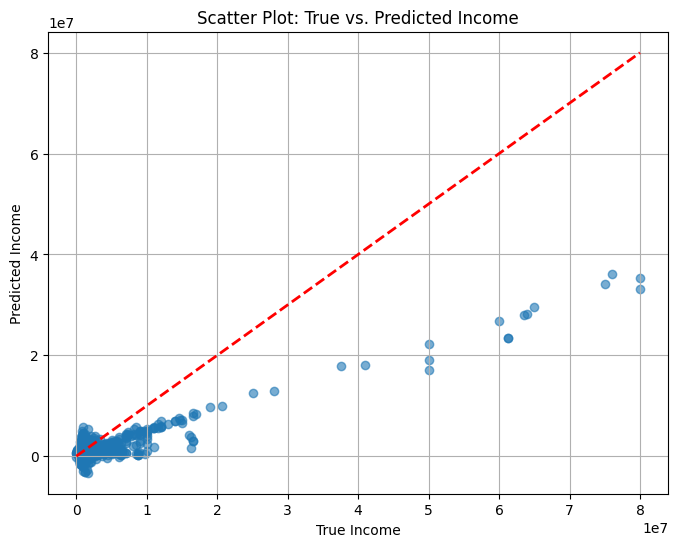

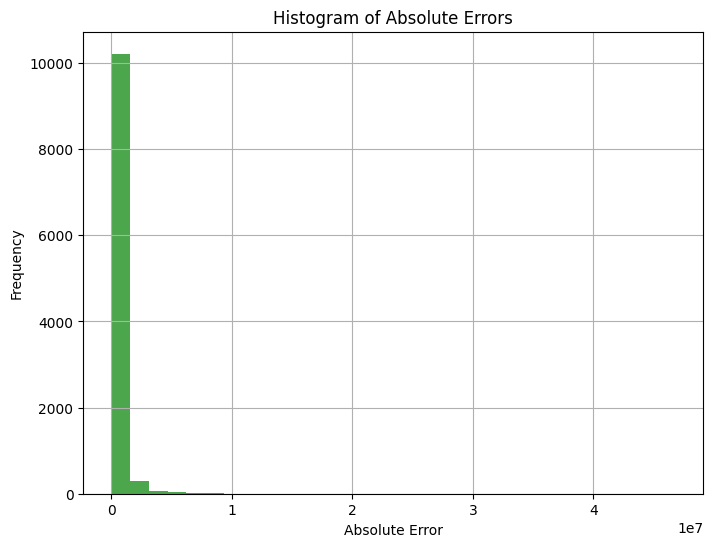

2025-02-08 18:39:30,636 - WARNING - Directory is not empty. Overwriting the contents.
2025-02-08 18:39:31,002 - INFO - Trained model saved to: tabres/tabtransformer_model.pth


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import warnings

# Suppress FutureWarnings coming from pytorch_tabular/pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import pytorch-tabular classes (ensure you have installed pytorch-tabular via pip)
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models.tab_transformer import TabTransformerConfig

# ----------------------------------------------------------------------
# Preprocessing Function: imputes missing values, scales numeric features,
# and fills missing categorical entries.
# ----------------------------------------------------------------------
def preprocess_data_from_df(df, target_column, missing_val_strategy='NO', scale_numeric=True):
    """
    Preprocesses a DataFrame:
      - Imputes missing numeric values (using mean, median, or zero).
      - Replaces missing categorical values with "missing".
      - Optionally scales numerical features (excluding the target).
    Returns:
      - Processed DataFrame,
      - List of categorical columns,
      - List of numerical columns.
    """
    # Identify columns by data type
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Remove target column from features list if present
    if target_column in numerical_columns:
        numerical_columns.remove(target_column)
    if target_column in categorical_columns:
        categorical_columns.remove(target_column)
    
    # Impute missing values for numerical columns
    for col in numerical_columns:
        if missing_val_strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif missing_val_strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif missing_val_strategy == 'NO':
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna(0)
    
    # Impute missing values for categorical columns
    for col in categorical_columns:
        df[col] = df[col].fillna("missing")
    
    # Optionally scale numerical columns
    if scale_numeric and numerical_columns:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df, categorical_columns, numerical_columns

# ----------------------------------------------------------------------
# Hyperparameters and Arguments
# Adjust these settings as needed.
# ----------------------------------------------------------------------
class Args:
    # File and target settings (update file_path as needed)
    file_path = r"C:\SAM_DAL\MULTIMODAL\agro_zone_cols_final.csv"  # Path to the CSV file
    id_column = "FarmerID"
    target = "Target_Variable/Total Income"
    
    # Task settings
    task = "regression"
    missing_strategy = "mean"
    scale_numeric = True
    scale_target = True  # Optionally scale the target variable
    
    # Data splitting parameters
    test_size = 0.2
    val_size = 0.2
    random_state = 42

    # Training hyperparameters
    max_epochs = 100
    batch_size = 128
    fast_dev_run = False

    # TabTransformer hyperparameters
    embedding_dropout = 0.1
    num_heads = 8
    num_attn_blocks = 6
    learning_rate = 0.0005
    loss = "L1Loss"  # Using L1Loss for robust regression
    
    # Model saving and output
    save_model = True
    model_save_path = "tabres/tabtransformer_model.pth"
    output_csv = "tabres/test_results.csv"

args = Args()

# ----------------------------------------------------------------------
# Main Function: Loads data, preprocesses it, trains and evaluates the model,
# and produces output results and plots.
# ----------------------------------------------------------------------
def main(args):
    logging.info("Loading raw data from CSV...")
    try:
        raw_data = pd.read_csv(args.file_path)
    except Exception as e:
        logging.error("Error reading CSV file: %s", e)
        return
    
    # Standardize column names: trim spaces and convert to lowercase
    raw_data.columns = [col.strip().lower() for col in raw_data.columns]
    id_col = args.id_column.strip().lower()
    target_col = args.target.strip().lower()
    
    logging.info("Columns in raw data: %s", raw_data.columns.tolist())
    
    if id_col not in raw_data.columns:
        raise KeyError(f"ID column '{args.id_column}' not found after standardization.")
    if target_col not in raw_data.columns:
        raise KeyError(f"Target column '{args.target}' not found after standardization.")
    
    # Preserve the original ID values
    preserved_ids = raw_data[id_col]
    
    # Remove the ID column before preprocessing
    data_for_model = raw_data.drop(columns=[id_col])
    
    logging.info("Preprocessing data...")
    data, categorical_columns, numerical_columns = preprocess_data_from_df(
        data_for_model,
        target_column=target_col,
        missing_val_strategy=args.missing_strategy,
        scale_numeric=args.scale_numeric
    )
    
    logging.info("Categorical Features: %s", categorical_columns)
    logging.info("Numerical Features: %s", numerical_columns)
    
    # Optionally scale the target variable
    if args.scale_target:
        target_scaler = StandardScaler()
        data[[target_col]] = target_scaler.fit_transform(data[[target_col]])
    else:
        target_scaler = None
    
    # Split data into train, validation, and test sets
    train_val_data, test_data = train_test_split(data, test_size=args.test_size, random_state=args.random_state)
    train_data, val_data = train_test_split(train_val_data, test_size=args.val_size, random_state=args.random_state)
    logging.info("Dataset shapes - Train: %s, Validation: %s, Test: %s", train_data.shape, val_data.shape, test_data.shape)
    
    # Get corresponding IDs for the test set from the raw data
    test_ids = raw_data.loc[test_data.index, id_col]
    
    # ------------------------------------------------------------------
    # Configure pytorch-tabular data and model settings
    # ------------------------------------------------------------------
    data_config = DataConfig(
        target=[target_col],
        continuous_cols=numerical_columns,
        categorical_cols=categorical_columns,
    )
    from pytorch_tabular.config import TrainerConfig

    trainer_config = TrainerConfig(
        max_epochs=100,  # Train for 100 full epochs
        batch_size=128,  # Suitable for large datasets
        auto_lr_find=False,
        early_stopping_patience=3,  # Effectively disables early stopping
        fast_dev_run=False
    )


    optimizer_config = OptimizerConfig()
    model_config = TabTransformerConfig(
        task=args.task,
        head="LinearHead",
        embedding_dropout=0.1,
        num_heads=32,  # Increase the number of attention heads
        num_attn_blocks=12,  # Increase attention blocks for more complexity
        learning_rate=0.0001,
        loss=args.loss,
        metrics=["mean_absolute_percentage_error", "mean_squared_error"]
    )

    # Create and train the model (backpropagation is handled internally)
    model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    
    logging.info("Starting model training...")
    model.fit(train=train_data, validation=val_data)
    
    logging.info("Evaluating model on test set...")
    eval_results = model.evaluate(test_data)
    logging.info("Test Evaluation Results: %s", eval_results)
    
    # Log the built-in MAPE directly from evaluation
    inbuilt_mape = eval_results[0]['test_mean_absolute_percentage_error']
    logging.info("Built-in MAPE: %.4f", inbuilt_mape)
    
    # Obtain predictions on the test set
    predictions = model.predict(test_data)
    if target_scaler is not None:
        predictions_original = target_scaler.inverse_transform(predictions)
        test_true_target_original = target_scaler.inverse_transform(test_data[[target_col]])
    else:
        predictions_original = predictions
        test_true_target_original = test_data[[target_col]]
    
    # Create a DataFrame with test results
    results_df = pd.DataFrame({
        "farmerid": test_ids,
        "True Target": test_true_target_original.flatten(),
        "Predicted Income": predictions_original.flatten()
    })
    results_df["Absolute Error"] = np.abs(results_df["True Target"] - results_df["Predicted Income"])
    results_df["Built-in MAPE"] = inbuilt_mape  # Log the same MAPE for reference
    
    # Create output directory if not exists
    os.makedirs(os.path.dirname(args.output_csv), exist_ok=True)
    os.makedirs(os.path.dirname(args.model_save_path), exist_ok=True)
    
    # Save splits and test results to CSV files
    train_data.to_csv("train_data.csv", index=False)
    val_data.to_csv("val_data.csv", index=False)
    test_data.to_csv("test_data.csv", index=False)
    results_df.to_csv(args.output_csv, index=False)
    logging.info("Test results saved to: %s", args.output_csv)
    
    # ------------------------------------------------------------------
    # Plotting: Scatter plot and histogram of absolute errors
    # ------------------------------------------------------------------
    # Scatter plot: True vs. Predicted Income
    plt.figure(figsize=(8, 6))
    plt.scatter(results_df["True Target"], results_df["Predicted Income"], alpha=0.6)
    plt.plot(
        [results_df["True Target"].min(), results_df["True Target"].max()],
        [results_df["True Target"].min(), results_df["True Target"].max()],
        'r--', lw=2
    )
    plt.xlabel("True Income")
    plt.ylabel("Predicted Income")
    plt.title("Scatter Plot: True vs. Predicted Income")
    plt.grid(True)
    plt.show()
    
    # Histogram of absolute errors
    plt.figure(figsize=(8, 6))
    plt.hist(results_df["Absolute Error"], bins=30, alpha=0.7, color='green')
    plt.xlabel("Absolute Error")
    plt.ylabel("Frequency")
    plt.title("Histogram of Absolute Errors")
    plt.grid(True)
    plt.show()
    
    # Save the trained model if desired
    if args.save_model:
        model.save_model(args.model_save_path)
        logging.info("Trained model saved to: %s", args.model_save_path)

if __name__ == "__main__":
    main(args)


2025-02-08 18:43:31,160 - INFO - Loading raw data from Excel...
2025-02-08 18:44:14,850 - INFO - Columns in raw data: ['farmerid', 'state', 'region', 'sex', 'city', 'zipcode', 'district', 'village', 'marital_status', 'location', 'address type', 'ownership', 'no_of_active_loan_in_bureau', 'avg_disbursement_amount_bureau', 'non_agriculture_income', 'total_land_for_agriculture', 'k022-village category based on agri parameters (good, average, poor)', 'k022-nearest mandi name', 'k022-proximity to nearest mandi (km)', 'k022-proximity to nearest railway (km)', 'ko22-village score based on socio-economic parameters (0 to 100)', 'k022-village category based on socio-economic parameters (good, average, poor)', 'k022-seasonal average rainfall (mm)', 'k022-ambient temperature (min & max)', 'r022-village category based on agri parameters (good, average, poor)', 'r022-seasonal average rainfall (mm)', 'r022-ambient temperature (min & max)', 'k021-seasonal average rainfall (mm)', 'k021-ambient tempera

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.7 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  1.2 M │ train │
│ 2 │ _head            │ LinearHead             │  1.3 K │ train │
│ 3 │ loss             │ L1Loss                 │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 2.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.9 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 304                                                                                         
Modules in eval mode: 0

Output()

c:\SAM_DAL\MULTIMODAL\multienv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.

c:\SAM_DAL\MULTIMODAL\multienv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.

2025-02-08 19:12:51,330 - INFO - Training the model completed
2025-02-08 19:12:51,333 - INFO - Loading the best model
2025-02-08 19:12:51,735 - INFO - Evaluating model on test set...
2025-02-08 19:12:52,343 - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

c:\SAM_DAL\MULTIMODAL\multienv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.01760190539062023         │
│ test_mean_absolute_percentage_error │          2.534013271331787          │
│       test_mean_squared_error       │        0.006585920695215464         │
└─────────────────────────────────────┴─────────────────────────────────────┘

2025-02-08 19:13:05,010 - INFO - Test Evaluation Results: [{'test_loss': 0.01760190539062023, 'test_mean_absolute_percentage_error': 2.534013271331787, 'test_mean_squared_error': 0.006585920695215464}]
2025-02-08 19:13:05,012 - INFO - Built-in MAPE: 2.5340
2025-02-08 19:17:25,613 - INFO - Test results saved to: tabres/test_results.csv


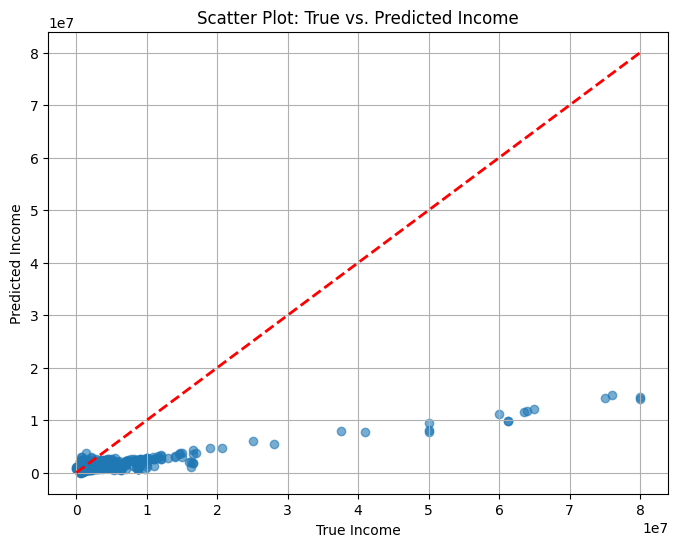

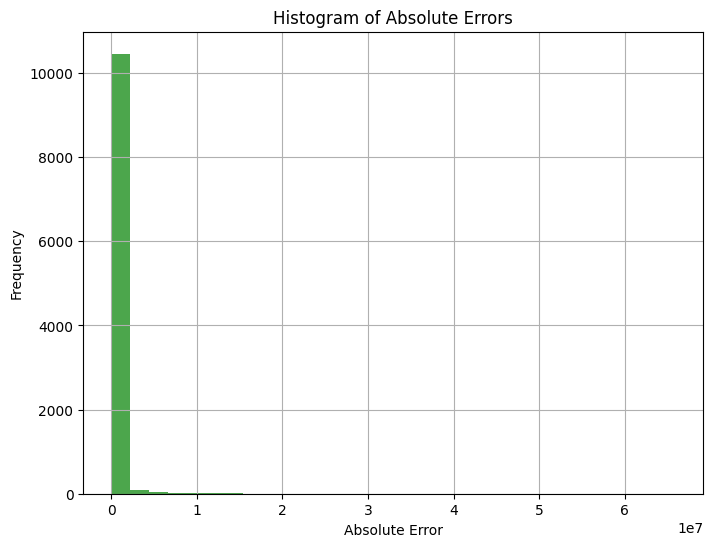

2025-02-08 19:17:31,472 - INFO - Trained model saved to: tabres/tabtransformer_model.pth


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import warnings

# Suppress FutureWarnings coming from pytorch_tabular/pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import pytorch-tabular classes (ensure you have installed pytorch-tabular via pip)
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models.tab_transformer import TabTransformerConfig

# ----------------------------------------------------------------------
# Preprocessing Function: imputes missing values, scales numeric features,
# and fills missing categorical entries.
# ----------------------------------------------------------------------
# def preprocess_data_from_df(df, target_column, missing_val_strategy='mean', scale_numeric=True):
def preprocess_data_from_df(df, target_column, missing_val_strategy='NO', scale_numeric=True):
    """
    Preprocesses a DataFrame:
      - Imputes missing numeric values (using mean, median, or zero).
      - Replaces missing categorical values with "missing".
      - Optionally scales numerical features (excluding the target).
    Returns:
      - Processed DataFrame,
      - List of categorical columns,
      - List of numerical columns.
    """
    # Identify columns by data type
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Remove target column from features list if present
    if target_column in numerical_columns:
        numerical_columns.remove(target_column)
    if target_column in categorical_columns:
        categorical_columns.remove(target_column)
    
    # Impute missing values for numerical columns
    for col in numerical_columns:
        if missing_val_strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif missing_val_strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif missing_val_strategy == 'NO':
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna(0)
    
    # Impute missing values for categorical columns
    for col in categorical_columns:
        df[col] = df[col].fillna("missing")
    
    # Optionally scale numerical columns
    if scale_numeric and numerical_columns:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df, categorical_columns, numerical_columns

# ----------------------------------------------------------------------
# Hyperparameters and Arguments
# Adjust these settings as needed.
# ----------------------------------------------------------------------
class Args:
    # File and target settings (update file_path as needed)
    file_path = r"C:\SAM_DAL\MULTIMODAL\TrainData.xlsx"  # Path to the Excel file
    id_column = "FarmerID"
    target = "Target_Variable/Total Income"
    
    sheet_name = None  # Use None to load the first sheet if multiple sheets are present

    # Task settings
    task = "regression"
    missing_strategy = "mean"
    scale_numeric = True
    scale_target = True  # Optionally scale the target variable
    
    # Data splitting parameters
    test_size = 0.2
    val_size = 0.2
    random_state = 42

    # Training hyperparameters
    max_epochs = 100
    batch_size = 128
    fast_dev_run = False

    # TabTransformer hyperparameters
    embedding_dropout = 0.1
    num_heads = 8
    num_attn_blocks = 6
    learning_rate = 0.0005
    loss = "L1Loss"  # Using L1Loss for robust regression
    
    # Model saving and output
    save_model = True
    model_save_path = "tabres/tabtransformer_model.pth"
    output_csv = "tabres/test_results.csv"

args = Args()

# ----------------------------------------------------------------------
# Main Function: Loads data, preprocesses it, trains and evaluates the model,
# and produces output results and plots.
# ----------------------------------------------------------------------
def main(args):
    logging.info("Loading raw data from Excel...")
    try:
        raw_data = pd.read_excel(args.file_path, sheet_name=args.sheet_name)
    except Exception as e:
        logging.error("Error reading Excel file: %s", e)
        return

    # If multiple sheets are present, select the first one.
    if isinstance(raw_data, dict):
        first_sheet = list(raw_data.keys())[0]
        raw_data = raw_data[first_sheet]
    
    # Standardize column names: trim spaces and convert to lowercase
    raw_data.columns = [col.strip().lower() for col in raw_data.columns]
    id_col = args.id_column.strip().lower()
    target_col = args.target.strip().lower()
    
    logging.info("Columns in raw data: %s", raw_data.columns.tolist())
    
    if id_col not in raw_data.columns:
        raise KeyError(f"ID column '{args.id_column}' not found after standardization.")
    if target_col not in raw_data.columns:
        raise KeyError(f"Target column '{args.target}' not found after standardization.")
    

    
    # Preserve the original ID values
    preserved_ids = raw_data[id_col]
    
    # Remove the ID column before preprocessing
    data_for_model = raw_data.drop(columns=[id_col])
    
    logging.info("Preprocessing data...")
    data, categorical_columns, numerical_columns = preprocess_data_from_df(
        data_for_model,
        target_column=target_col,
        missing_val_strategy=args.missing_strategy,
        scale_numeric=args.scale_numeric
    )
    
    logging.info("Categorical Features: %s", categorical_columns)
    logging.info("Numerical Features: %s", numerical_columns)
    
    # Optionally scale the target variable
    if args.scale_target:
        target_scaler = StandardScaler()
        data[[target_col]] = target_scaler.fit_transform(data[[target_col]])
    else:
        target_scaler = None
    
    # Split data into train, validation, and test sets
    train_val_data, test_data = train_test_split(data, test_size=args.test_size, random_state=args.random_state)
    train_data, val_data = train_test_split(train_val_data, test_size=args.val_size, random_state=args.random_state)
    logging.info("Dataset shapes - Train: %s, Validation: %s, Test: %s", train_data.shape, val_data.shape, test_data.shape)
    
    # Get corresponding IDs for the test set from the raw data
    test_ids = raw_data.loc[test_data.index, id_col]
    



    # ------------------------------------------------------------------
    # Configure pytorch-tabular data and model settings
    # ------------------------------------------------------------------
    data_config = DataConfig(
        target=[target_col],
        continuous_cols=numerical_columns,
        categorical_cols=categorical_columns,
    )
    from pytorch_tabular.config import TrainerConfig

    trainer_config = TrainerConfig(
        max_epochs=100,  # Train for 100 full epochs
        batch_size=128,  # Suitable for large datasets
        auto_lr_find=False,
        early_stopping_patience=10,  # Effectively disables early stopping
        fast_dev_run=False
    )


    optimizer_config = OptimizerConfig()
    model_config = TabTransformerConfig(
        task=args.task,
        head="LinearHead",
        embedding_dropout=0.1,
        num_heads=32,  # Increase the number of attention heads
        num_attn_blocks=12,  # Increase attention blocks for more complexity
        learning_rate=0.0001,
        loss=args.loss,
        metrics=["mean_absolute_percentage_error", "mean_squared_error"]
    )

    
    # Create and train the model (backpropagation is handled internally)
    model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    
    logging.info("Starting model training...")
    model.fit(train=train_data, validation=val_data)
    
    logging.info("Evaluating model on test set...")
    eval_results = model.evaluate(test_data)
    logging.info("Test Evaluation Results: %s", eval_results)
    
    # Log the built-in MAPE directly from evaluation
    inbuilt_mape = eval_results[0]['test_mean_absolute_percentage_error']
    logging.info("Built-in MAPE: %.4f", inbuilt_mape)
    
    # Obtain predictions on the test set
    predictions = model.predict(test_data)
    if target_scaler is not None:
        predictions_original = target_scaler.inverse_transform(predictions)
        test_true_target_original = target_scaler.inverse_transform(test_data[[target_col]])
    else:
        predictions_original = predictions
        test_true_target_original = test_data[[target_col]]
    
    # Create a DataFrame with test results
    results_df = pd.DataFrame({
        "farmerid": test_ids,
        "True Target": test_true_target_original.flatten(),
        "Predicted Income": predictions_original.flatten()
    })
    results_df["Absolute Error"] = np.abs(results_df["True Target"] - results_df["Predicted Income"])
    results_df["Built-in MAPE"] = inbuilt_mape  # Log the same MAPE for reference
    
    # Create output directory if not exists
    os.makedirs(os.path.dirname(args.output_csv), exist_ok=True)
    os.makedirs(os.path.dirname(args.model_save_path), exist_ok=True)
    
    # Save splits and test results to CSV files
    train_data.to_csv("train_data.csv", index=False)
    val_data.to_csv("val_data.csv", index=False)
    test_data.to_csv("test_data.csv", index=False)
    results_df.to_csv(args.output_csv, index=False)
    logging.info("Test results saved to: %s", args.output_csv)
    
    # ------------------------------------------------------------------
    # Plotting: Scatter plot and histogram of absolute errors
    # ------------------------------------------------------------------
    # Scatter plot: True vs. Predicted Income
    plt.figure(figsize=(8, 6))
    plt.scatter(results_df["True Target"], results_df["Predicted Income"], alpha=0.6)
    plt.plot(
        [results_df["True Target"].min(), results_df["True Target"].max()],
        [results_df["True Target"].min(), results_df["True Target"].max()],
        'r--', lw=2
    )
    plt.xlabel("True Income")
    plt.ylabel("Predicted Income")
    plt.title("Scatter Plot: True vs. Predicted Income")
    plt.grid(True)
    plt.show()
    
    # Histogram of absolute errors
    plt.figure(figsize=(8, 6))
    plt.hist(results_df["Absolute Error"], bins=30, alpha=0.7, color='green')
    plt.xlabel("Absolute Error")
    plt.ylabel("Frequency")
    plt.title("Histogram of Absolute Errors")
    plt.grid(True)
    plt.show()
    
    # Save the trained model if desired
    if args.save_model:
        model.save_model(args.model_save_path)
        logging.info("Trained model saved to: %s", args.model_save_path)



if __name__ == "__main__":
    main(args)
